## Load Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_rows', 500)

In [3]:
file_loc = 'C:/Users/kelvi/OneDrive/Documents/Data Projects/Data/credit/'
file_name ='bureau_balance.csv'
data_name = 'bureau_balance'
dict_loc = 'C:/Users/kelvi/OneDrive/Documents/Data Projects/Data/credit/HomeCredit_columns_description.csv'

## Load Data

In [4]:
df = pd.read_csv(file_loc + file_name)

In [5]:
df.describe(include='all')

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
count,2.729992e+07,2.729992e+07,27299925
unique,NaN,NaN,8
top,NaN,NaN,C
freq,NaN,NaN,13646993
mean,6.036297e+06,-3.074169e+01,NaN
std,4.923489e+05,2.386451e+01,NaN
min,5.001709e+06,-9.600000e+01,NaN
25%,5.730933e+06,-4.600000e+01,NaN
50%,6.070821e+06,-2.500000e+01,NaN
75%,6.431951e+06,-1.100000e+01,NaN


In [6]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB


## Load Data Dictionary

In [7]:
data_dictionary = pd.read_csv(dict_loc, engine='python')
data_dictionary[data_dictionary['Table']==file_name]

,Unnamed: 0,Table,Row,Description,Special
139,142,bureau_balance.csv,SK_BUREAU_ID,Recoded ID of Credit Bureau credit (unique cod...,hashed
140,143,bureau_balance.csv,MONTHS_BALANCE,Month of balance relative to application date ...,time only relative to the application
141,144,bureau_balance.csv,STATUS,Status of Credit Bureau loan during the month ...,NaN


## Simple charts of each feature

SK_ID_BUREAU  -  817395  unique. Type =  int64
description not found


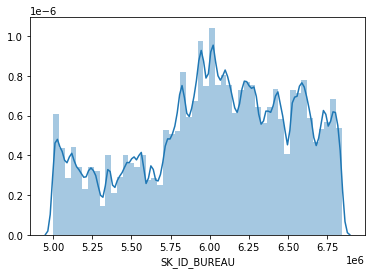

MONTHS_BALANCE  -  97  unique. Type =  int64
Month of balance relative to application date (-1 means the freshest balance date)


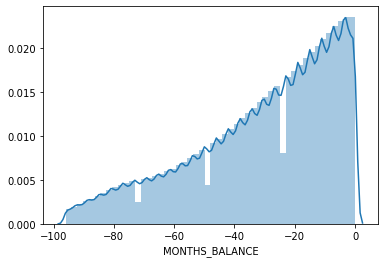

STATUS  -  8  unique. Type =  object
Status of Credit Bureau loan during the month (active, closed, DPD0-30,… [C means closed, X means status unknown, 0 means no DPD, 1 means maximal did during month between 1-30, 2 means DPD 31-60,… 5 means DPD 120+ or sold or written off ] )


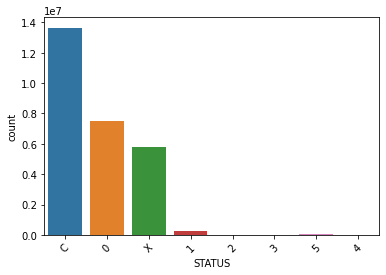

In [8]:
for column in df:
    print(column, " - ", df[column].nunique(), " unique. Type = ", df[column].dtype)
    try:
        print(data_dictionary.loc[(data_dictionary.Table==file_name) & (data_dictionary.Row==column)]['Description'].values[0])
    except:
        print("description not found")
    
    if df[column].dtype=='object':
        sns.countplot(data=df, x=column)
        plt.xticks(rotation=45)
    elif df[column].dtype=='int64':
        if df[column].nunique() < 20:
            sns.countplot(data=df, x=column)
        else:
            sns.distplot(df[column])
    elif df[column].dtype=='float64':
        sns.distplot(df[column])
    plt.show()

## Null Value Analysis

In [9]:
df_null_values = df.isnull().sum()
df_only_null_values = df_null_values.loc[(df_null_values!=0)].to_frame().reset_index()
df_only_null_values.rename(columns={'index':'row', 0:'value'}, inplace=True)
df_only_null_values.sort_values(by='value',ascending=False)



,row,value


In [10]:
plot_order = df_only_null_values.sort_values(by='value', ascending=False).row.values
sns.barplot(x='row', y='value', data=df_only_null_values, order=plot_order)
plt.xticks(rotation=90)
plt.show()

ValueError: min() arg is an empty sequence

## Create an Output for univariate analysis

In [11]:
import pandas as pd
import sweetviz as sv

#EDA using Autoviz
sweet_report = sv.analyze(df)

#Saving results to HTML file
sweet_report.show_html('analysis ' + data_name + '.html')


Report analysis bureau_balance.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Correlation Matrix

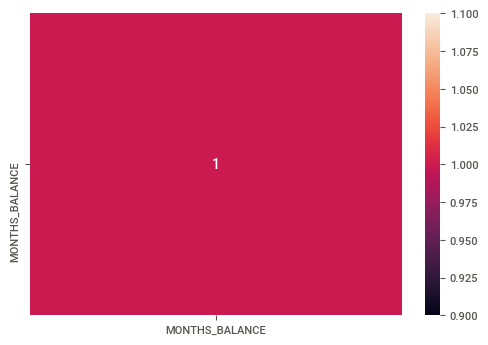

In [14]:
corrMatrix = df.drop(['SK_ID_BUREAU'], axis=1).corr().round(1)
sns.heatmap(corrMatrix, annot=True)
plt.show()